In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Read the raw data

In [4]:
filename = '../../data/new_experiment_2019/data_2019-11-15_15-55.npy'
data = np.load(filename, allow_pickle=True)

In [22]:
# Reverse-engineer the data format...
names = ['avg','time','std']
[print(n, 'shape:', d.shape) for n,d in zip(names,data)]
[print(n, 'first length:', len(d[0])) for n,d in zip(names,data)]
[print(n, 'first type:', type(d[0])) for n,d in zip(names,data)]
[print(n, 'first first type:', type(d[0][0])) for n,d in zip(names,data)]
print(len(data[0]))
average, time, std = data

avg shape: (6,)
time shape: (6,)
std shape: (6,)
avg first length: 5
time first length: 299
std first length: 5
avg first type: <class 'list'>
time first type: <class 'list'>
std first type: <class 'list'>
avg first first type: <class 'list'>
time first first type: <class 'int'>
std first first type: <class 'list'>
6


In [27]:
SERIES_COUNT = 6

### Data conversion functions

In [28]:
def to_detector_data(data, detector_id, series_id):
    avg = data[0][series_id][detector_id]
    time = data[1][series_id]
    std = data[2][series_id][detector_id]
    return avg, time, std

def plot_series(data, series_id, detector_id):
    avg, time, std = to_detector_data(data, detector_id=detector_id, series_id=series_id)
    plt.plot(time, avg)

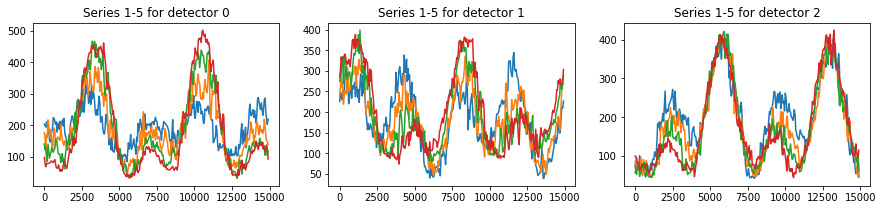

In [42]:
def _plot_some_series(data, series, detector_id):
    for i in series:
        if i<0 or i>SERIES_COUNT-1: raise Exception(f"We have {SERIES_COUNT} series, asked index {i}")
        plot_series(data, i, detector_id)
    plt.title(f"Series {series[0]}-{series[-1]} for detector {detector_id}" )
        
plt.subplots(figsize=(15,3))
plt.subplot(131)
_plot_some_series(data, range(1,6), detector_id=0)
plt.subplot(132)
_plot_some_series(data, range(1,6), detector_id=1)
plt.subplot(133)
_plot_some_series(data, range(1,6), detector_id=2)